In [1]:
import sys
sys.path.append('..')
import torch 
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

import torchvision
import torchvision.transforms.functional as TF
import torchvision.transforms as transforms 

import albumentations as A
from albumentations import Compose
from albumentations.pytorch.transforms import ToTensorV2

/work/hpc/dqm/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


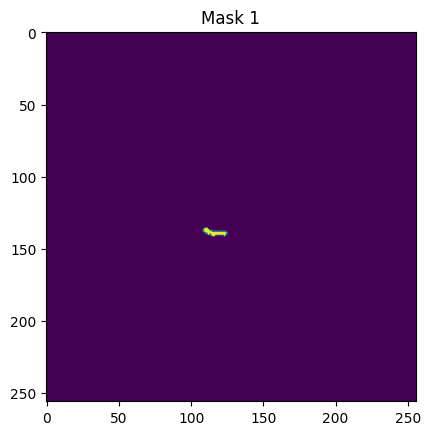

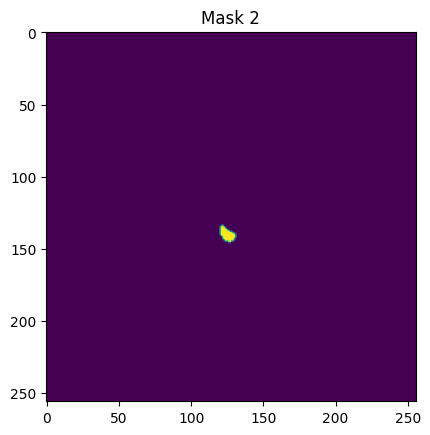

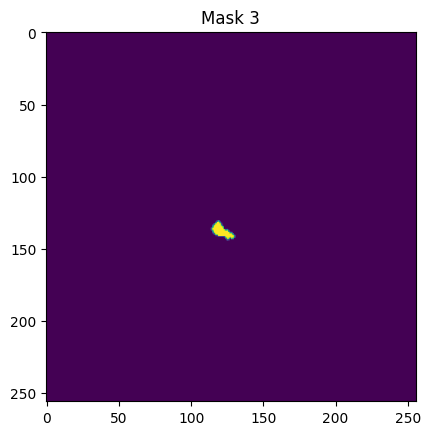

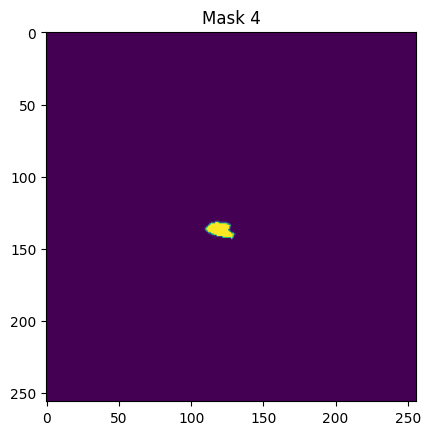

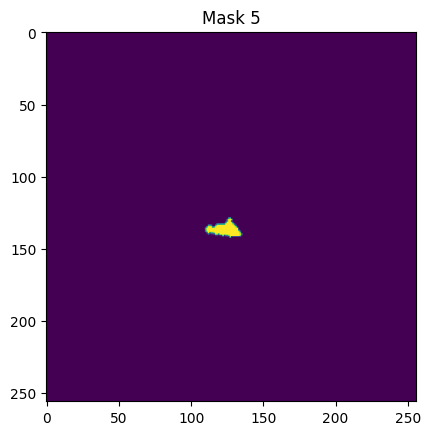

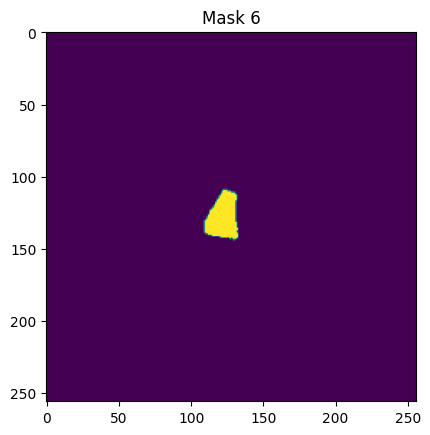

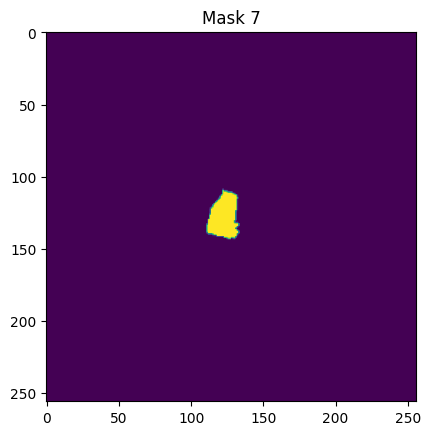

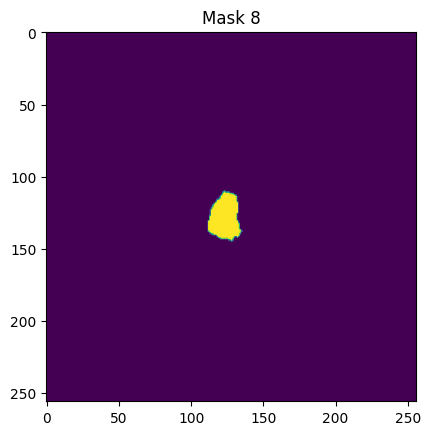

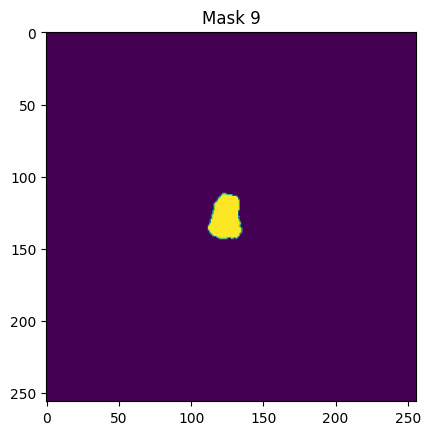

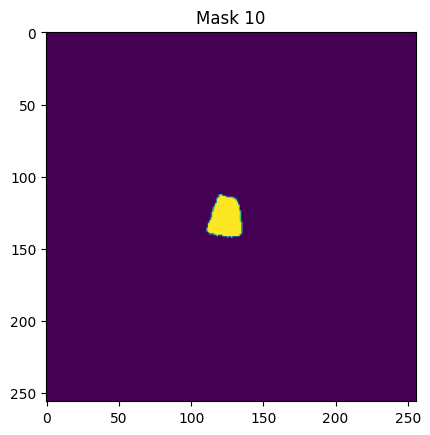

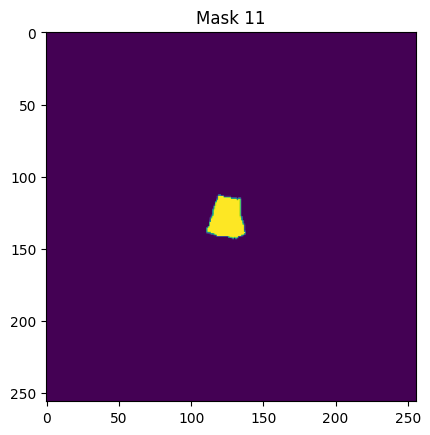

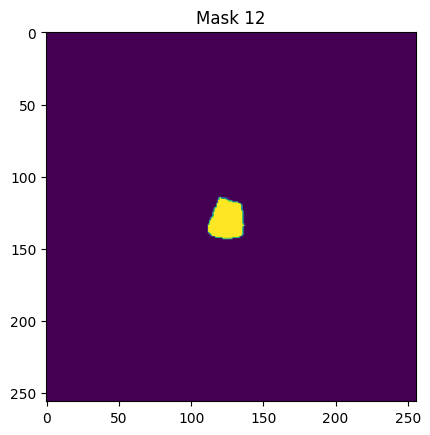

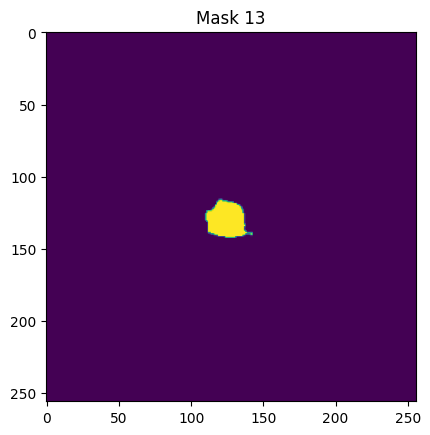

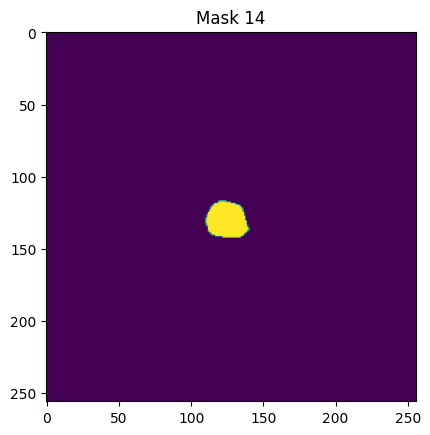

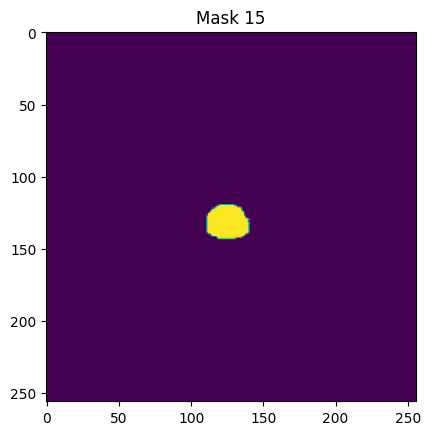

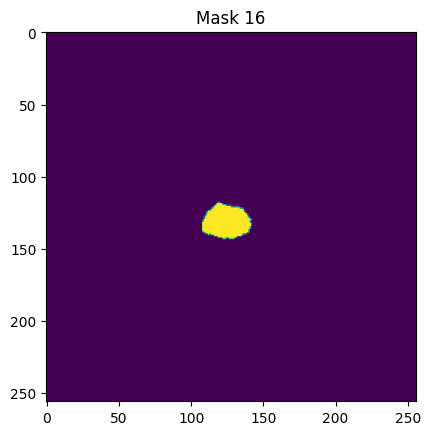

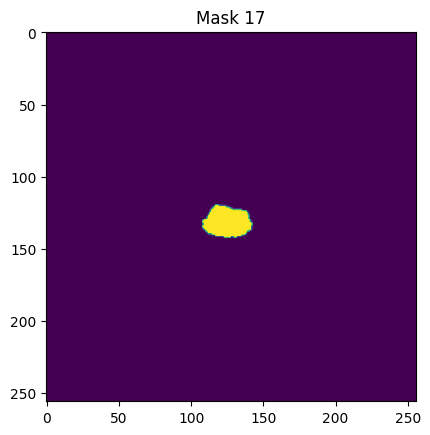

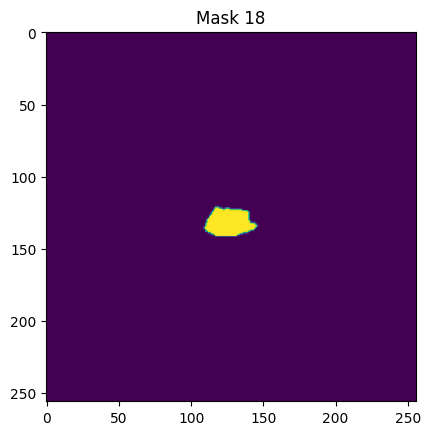

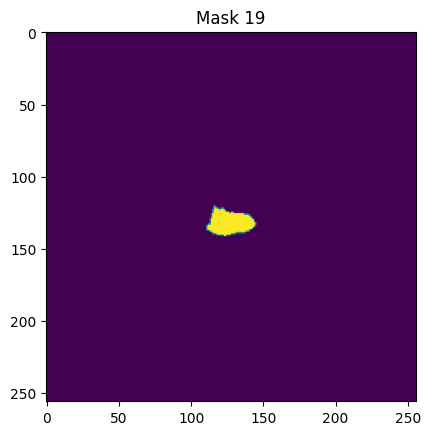

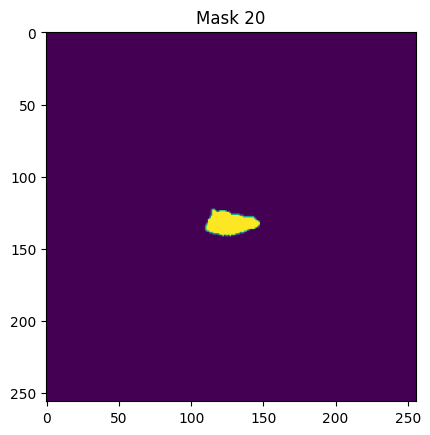

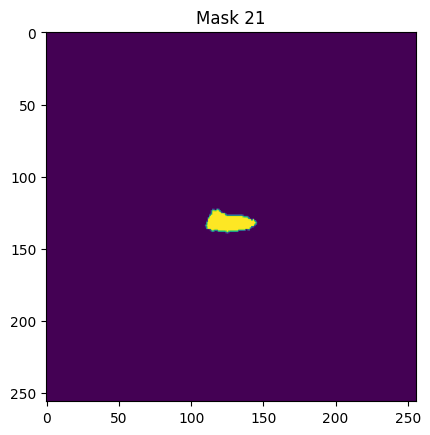

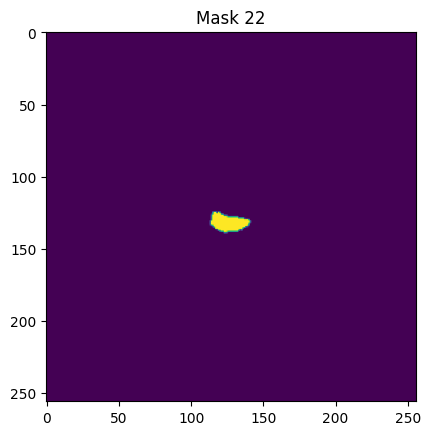

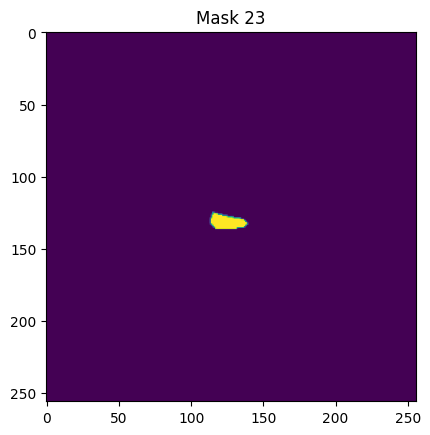

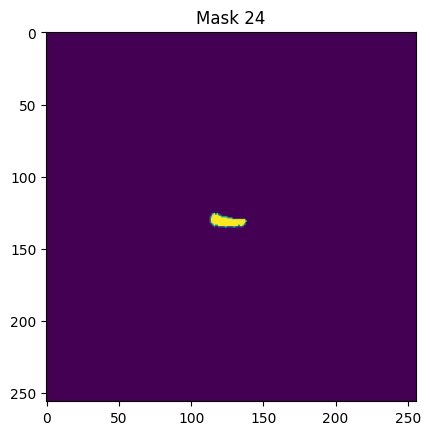

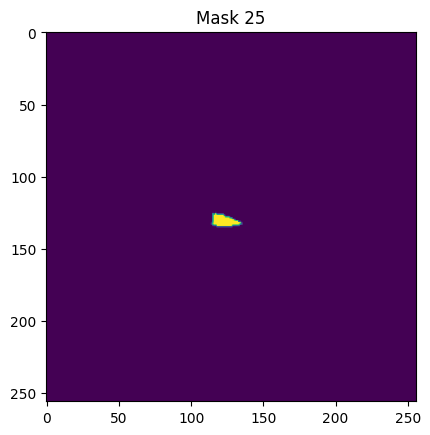

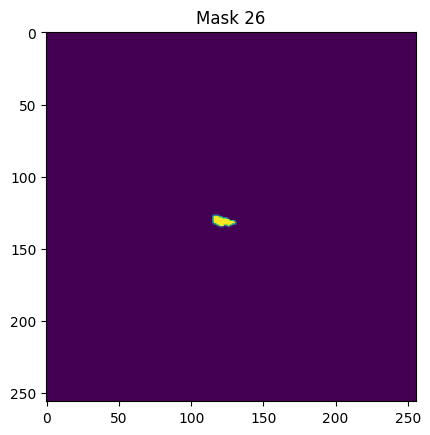

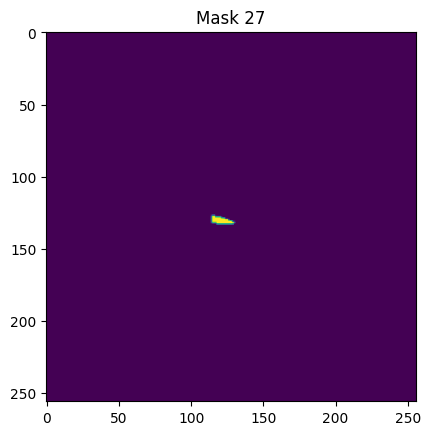

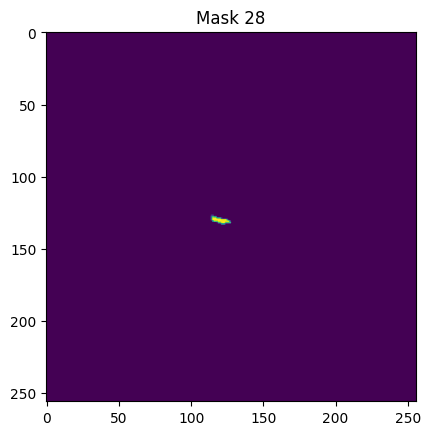

In [11]:
nodule_dir = "/work/hpc/pgl/LIDC-IDRI-Preprocessing/segment_data/Image"
clean_dir = "/work/hpc/pgl/LIDC-IDRI-Preprocessing/segment_data/Clean/Image"

transform = Compose([
    A.Resize(256, 256),
    ToTensorV2(),
])

image_nodule_list = []

for root, _, files in os.walk(nodule_dir):
        arr = []
        for file in files:
            if file.endswith(".npy"):
                dicom_path = os.path.join(root, file)
                mask_path = dicom_path.replace("Image", "Mask")
                mask_path = mask_path.replace("NI", "MA")
                arr.append(mask_path)
        image_nodule_list.append(arr)


for i, image_path in enumerate(image_nodule_list[2]):
    # Đọc ảnh từ đường dẫn
    image = np.load(image_path).astype(np.uint8) * 255
    
    transformed = transform(image=image)
    image = transformed["image"]
    
    # Hiển thị ảnh
    plt.imshow(image.squeeze())
    plt.title(f"Mask {i+1}")  # Thêm tiêu đề cho mỗi ảnh
    plt.show()

In [2]:
nodule_dir = "/work/hpc/pgl/LIDC-IDRI-Preprocessing/segment_data/Image"
clean_dir = "/work/hpc/pgl/LIDC-IDRI-Preprocessing/segment_data/Clean/Image"

image_nodule_list = []
image_clean_list = []

for root, _, files in os.walk(nodule_dir):
    for file in files:
        if file.endswith(".npy"):
            dicom_path = os.path.join(root, file)
            image_nodule_list.append(dicom_path)

for root, _, files in os.walk(clean_dir):
    for file in files:
        if file.endswith(".npy"):
            dicom_path = os.path.join(root, file)
            image_clean_list.append(dicom_path)

In [5]:
print(image_nodule_list[25])

/work/hpc/pgl/LIDC-IDRI-Preprocessing/segment_data/Image/LIDC-IDRI-0002/0002_NI000_slice017.npy


In [13]:
def _get_file_list():
    nodule_file_list = []
    for dicom_path in image_nodule_list:

        # Get mask path of nodule image
        mask_path = dicom_path.replace("Image", "Mask")
        mask_path = mask_path.replace("NI", "MA")

        # Check whether mask path exist
        if os.path.exists(mask_path):

            image = np.load(dicom_path)

            # image = self._normalize_image(image)
            mask = np.load(mask_path)

            # convert image, mask to tensor

            nodule_file_list.append((image, mask))

    clean_file_list = []
    for dicom_path in image_clean_list:
        # Get mask path of nodule image

        mask_path = dicom_path.replace("Image", "Mask")
        mask_path = mask_path.replace("CN", "CM")

        # Check whether mask path exist

        if os.path.exists(mask_path):

            image = np.load(dicom_path)

            # image = self._normalize_image(image)
            mask = np.load(mask_path)

            clean_file_list.append((image, mask))

    return nodule_file_list, clean_file_list

In [14]:
nodule_file_list, clean_file_list = _get_file_list()
print(len(nodule_file_list))
print(len(clean_file_list))

13916
6885


In [7]:
image, mask = nodule_file_list[0]

image = torch.from_numpy(image).to(torch.float)
mask = torch.from_numpy(mask).to(torch.float)

print(image)
print(mask)
print(mask.sum())

tensor([[  168.,   147.,   150.,  ...,   918.,   922.,   926.],
        [  213.,   205.,   175.,  ...,   908.,   901.,   926.],
        [  178.,   178.,   192.,  ...,   903.,   911.,   940.],
        ...,
        [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
        [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor(262.)


In [10]:
def plt_data(y):
    # Plot image, mask
    fig, axs = plt.subplots(5, 2)

    for i in range(y, y + 5):
        x = i - y
        axs[x, 0].imshow(nodule_file_list[x][0])
        axs[x, 0].set_title(f'Image {x+1}')

        axs[x, 1].imshow(nodule_file_list[x][1])
        axs[x, 1].set_title(f'Mask {x+1}')

        axs[x, 0].set_axis_off()
        axs[x, 1].set_axis_off()

    plt.show()
    
def plt_img_mask(image, mask):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    axes[0].imshow(image)
    axes[0].set_title('Image')

    axes[1].imshow(mask)
    axes[1].set_title('Mask')

    for ax in axes:
        ax.axis('off')
    
    plt.show()

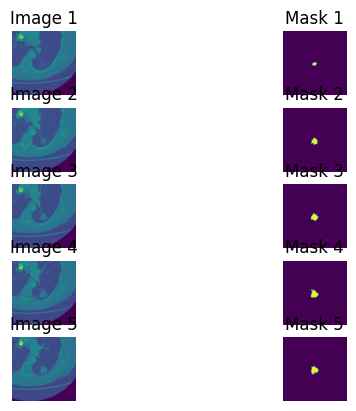

In [31]:
plt_data(0)

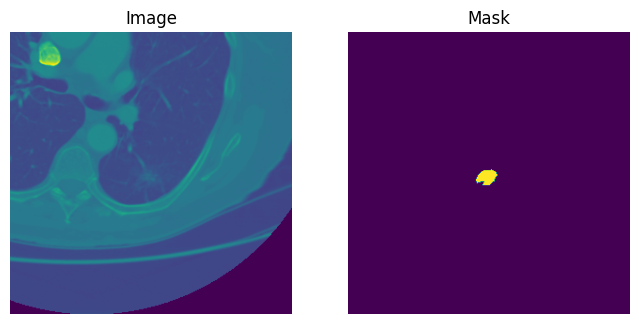

In [9]:
image, mask = nodule_file_list[0]

plt_img_mask(image, mask)


In [13]:
transform = transforms.Compose([transforms.ToTensor()])
image, mask = nodule_file_list[0]

# print(image.dtype, mask.dtype) # float64, bool

transformed = transform(image)

print(transformed)
# print(transformed.shape) # 1, 300, 300


tensor([[[  168.,   147.,   150.,  ...,   918.,   922.,   926.],
         [  213.,   205.,   175.,  ...,   908.,   901.,   926.],
         [  178.,   178.,   192.,  ...,   903.,   911.,   940.],
         ...,
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]],
       dtype=torch.float64)


In [27]:
transform = Compose([
    ToTensorV2(),
])
image, mask = nodule_file_list[0] # float64, bool
print(image.shape, mask.shape)

mask = mask.astype(np.float32)
transformed = transform(image=image, mask=mask)

transformed_image = transformed["image"]
print(transformed_image)
print(transformed_image.shape)

transformed_mask = transformed["mask"]
print(transformed_mask)
print(transformed_mask.shape)
print(transformed_mask.sum())
print(transformed_mask.dtype)



(300, 300) (300, 300)
tensor([[[  168.,   147.,   150.,  ...,   918.,   922.,   926.],
         [  213.,   205.,   175.,  ...,   908.,   901.,   926.],
         [  178.,   178.,   192.,  ...,   903.,   911.,   940.],
         ...,
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.],
         [-1024., -1024., -1024.,  ..., -1024., -1024., -1024.]]],
       dtype=torch.float64)
torch.Size([1, 300, 300])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
torch.Size([300, 300])
tensor(262.)
torch.float32


In [3]:
# Normalize image
def _normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)

    if max_val - min_val > 0:
        image = (image - min_val) / (max_val - min_val)

    return image

In [91]:
image, mask = nodule_file_list[0] # float64, bool
print(image.shape)
print(image)

nor_img = _normalize_image(image)
print(nor_img.shape)
print(nor_img)


(300, 300)
[[  168.   147.   150. ...   918.   922.   926.]
 [  213.   205.   175. ...   908.   901.   926.]
 [  178.   178.   192. ...   903.   911.   940.]
 ...
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]
 [-1024. -1024. -1024. ... -1024. -1024. -1024.]]
(300, 300)
[[0.23436886 0.23023987 0.23082973 ... 0.38183248 0.38261895 0.38340543]
 [0.24321667 0.24164373 0.23574518 ... 0.3798663  0.37848997 0.38340543]
 [0.23633504 0.23633504 0.23908769 ... 0.37888321 0.38045615 0.38615808]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [92]:
def plt_trans(image, mask, transformed_image, transformed_mask):
    fig, axes = plt.subplots(2, 2, figsize=(12, 6))

    axes[0, 0].imshow(image)
    axes[0, 0].set_title('Image')

    axes[0, 1].imshow(mask)
    axes[0, 1].set_title('Mask')

    axes[1, 0].imshow(transformed_image)
    axes[1, 0].set_title('Image_trans')

    axes[1, 1].imshow(transformed_mask)
    axes[1, 1].set_title('Mask_trans')

    axes[0, 0].set_axis_off()
    axes[0, 1].set_axis_off()
    axes[1, 0].set_axis_off()
    axes[1, 1].set_axis_off()
        
    plt.show()

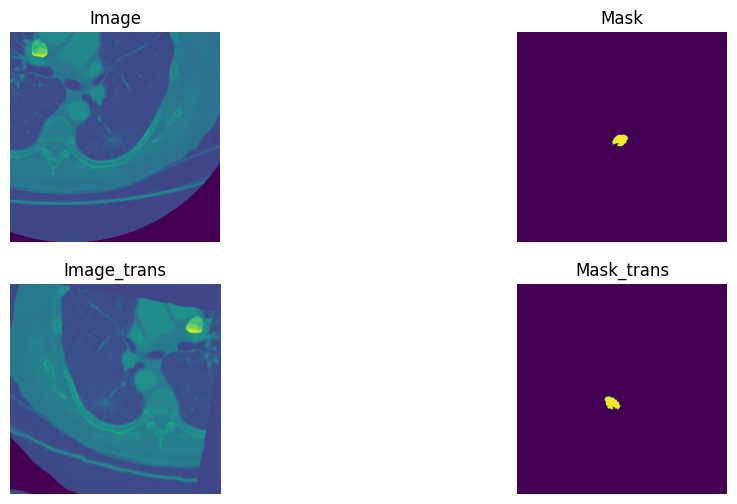

In [100]:
# Transform
transform = Compose([
    A.Affine(translate_percent = 0.05, rotate = 5, shear = 5, p = 1.0),
    A.HorizontalFlip(p = 1.0),
    A.ElasticTransform(alpha = 20, alpha_affine = 0.5, sigma = 5, p = 1.0),
    ToTensorV2(),
])
image, mask = nodule_file_list[0] # float64, bool
mask = mask.astype(np.float32)

transformed = transform(image=image, mask=mask)

transformed_image = transformed["image"]
transformed_mask = transformed["mask"]

plt_trans(image, mask, transformed_image.squeeze(), transformed_mask)

In [104]:
print(transformed_image)
print(transformed_image[0][200][200])

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], dtype=torch.float64)
tensor(1530.3169, dtype=torch.float64)


In [5]:
def _get_file_list_normalize():
    nodule_file_list = []
    for dicom_path in image_nodule_list:

        # Get mask path of nodule image
        mask_path = dicom_path.replace("Image", "Mask")
        mask_path = mask_path.replace("NI", "MA")

        # Check whether mask path exist
        if os.path.exists(mask_path):

            image = np.load(dicom_path)

            image = _normalize_image(image)
            mask = np.load(mask_path)

            # convert image, mask to tensor

            nodule_file_list.append((image, mask))

    clean_file_list = []
    for dicom_path in image_clean_list:
        # Get mask path of nodule image

        mask_path = dicom_path.replace("Image", "Mask")
        mask_path = mask_path.replace("CN", "CM")

        # Check whether mask path exist

        if os.path.exists(mask_path):

            image = np.load(dicom_path)

            image = _normalize_image(image)
            mask = np.load(mask_path)

            clean_file_list.append((image, mask))

    return nodule_file_list, clean_file_list

In [6]:
nodule_file_list_normalize, clean_file_list_normalize = _get_file_list_normalize()
print(len(nodule_file_list_normalize))
print(len(clean_file_list_normalize))

13916
6885


torch.float32
tensor([[0.2972, 0.3064, 0.3175,  ..., 0.0000, 0.0000, 0.0000],
        [0.3331, 0.3273, 0.3175,  ..., 0.0000, 0.0000, 0.0000],
        [0.4401, 0.3821, 0.3257,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2919, 0.2938, 0.2961,  ..., 0.0000, 0.0000, 0.0000],
        [0.2951, 0.2943, 0.2906,  ..., 0.0000, 0.0000, 0.0000],
        [0.2898, 0.2906, 0.2885,  ..., 0.0000, 0.0000, 0.0000]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


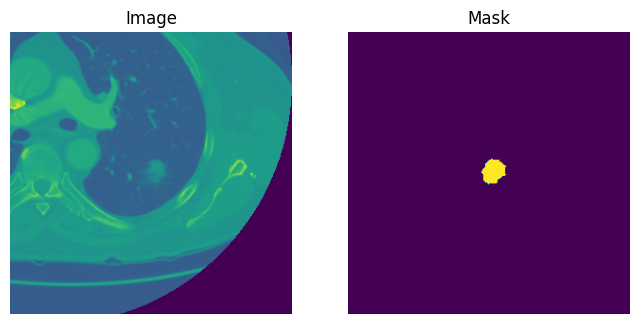

In [29]:
image, mask = nodule_file_list_normalize[50]

image = torch.from_numpy(image).to(torch.float)
mask = torch.from_numpy(mask).to(torch.float)
print(image.dtype)
print(image)
print(mask)

plt_img_mask(image, mask)


[[  103.   138.   180. ... -1024. -1024. -1024.]
 [  239.   217.   180. ... -1024. -1024. -1024.]
 [  645.   425.   211. ... -1024. -1024. -1024.]
 ...
 [   83.    90.    99. ... -1024. -1024. -1024.]
 [   95.    92.    78. ... -1024. -1024. -1024.]
 [   75.    78.    70. ... -1024. -1024. -1024.]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


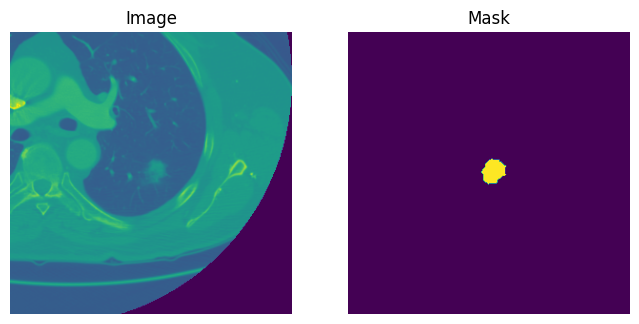

In [24]:
image, mask = nodule_file_list[50]
print(image)
print(mask)

plt_img_mask(image, mask)

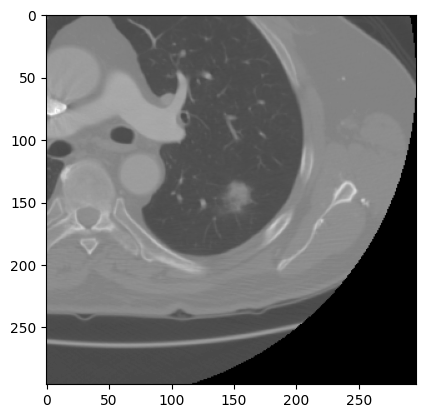

In [33]:
# Show normalize
plt.imshow(image, cmap='gray')

In [34]:
print(image)

tensor([[0.2972, 0.3064, 0.3175,  ..., 0.0000, 0.0000, 0.0000],
        [0.3331, 0.3273, 0.3175,  ..., 0.0000, 0.0000, 0.0000],
        [0.4401, 0.3821, 0.3257,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.2919, 0.2938, 0.2961,  ..., 0.0000, 0.0000, 0.0000],
        [0.2951, 0.2943, 0.2906,  ..., 0.0000, 0.0000, 0.0000],
        [0.2898, 0.2906, 0.2885,  ..., 0.0000, 0.0000, 0.0000]])
